<center><u><H1>Latent Semantic Analysis (LSA)</H1></u></center><br>
LSA (Latent Semantic Analysis) also known as LSI (Latent Semantic Index) LSA uses bag of word(BoW) model, which results in a term-document matrix(occurrence of terms in a document). Rows represent terms and columns represent documents.<br> LSA learns latent topics by performing a matrix decomposition on the document-term matrix using Singular value decomposition. LSA is typically used as a dimensionality reduction or noise reducing technique.

In [32]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, MiniBatchKMeans

In [33]:
categories = ['rec.autos', 'sci.electronics', 'comp.graphics']

In [34]:
data = fetch_20newsgroups(subset='all', categories=categories,
                          shuffle=True, random_state=2017)

In [35]:
# Tfidf vectorizer:
#   - Strips out “stop words”
vectorizer = TfidfVectorizer(stop_words='english')

# Build the tfidf vectorizer from the training data ("fit"), and apply it 
# ("transform").
X = vectorizer.fit_transform(data.data)

In [36]:
print("  Actual number of tfidf features: %d" % X.get_shape()[1])

  Actual number of tfidf features: 34736


### Learn latent topics by applying SVD on TF-IDF vectors

In [37]:
# Project the tfidf vectors onto the first N principal components.
# Though this is significantly fewer features than the original tfidf vector,
# they are stronger features, and the accuracy is higher.

svd = TruncatedSVD(2000) #Desired dimensionality of output data
lsa = make_pipeline(svd, Normalizer(copy=False))

In [38]:
# # Run SVD on the data, then project the data.
X = lsa.fit_transform(X)

In [39]:
explained_variance = svd.explained_variance_ratio_.sum()
print("  Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

  Explained variance of the SVD step: 93%


In [40]:
### Apply Clustering on the data

In [41]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
terms = vectorizer.get_feature_names()
original_centroids = svd.inverse_transform(kmeans.cluster_centers_)
order_centroids = original_centroids.argsort()[:,::-1]

In [43]:
for i in range(3):
    print("Cluster(topic) %d:" % i)
    for ix in order_centroids[i, :10]:
        print(' %s' % terms[ix])

Cluster(topic) 0:
 edu
 battery
 com
 hp
 cview
 version
 se
 points
 tin
 washington
Cluster(topic) 1:
 car
 com
 edu
 cars
 writes
 article
 engine
 just
 subject
 organization
Cluster(topic) 2:
 edu
 lines
 university
 subject
 organization
 com
 graphics
 posting
 host
 nntp


### Mini batch K-means

In [44]:
kmini = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=1,
                        init_size=1000,
                       batch_size=1000
                       )

In [45]:
kmini_model = kmini.fit(X)

In [46]:
original_centroids = svd.inverse_transform(kmini_model.cluster_centers_)
order_centroids = original_centroids.argsort()[:,::-1]

In [47]:
for i in range(3):
    print("Cluster(topic) %d:" % i)
    for ix in order_centroids[i, :10]:
        print(' %s' % terms[ix])

Cluster(topic) 0:
 edu
 car
 university
 article
 writes
 lines
 subject
 organization
 host
 posting
Cluster(topic) 1:
 com
 hp
 lines
 subject
 organization
 ca
 writes
 car
 article
 like
Cluster(topic) 2:
 graphics
 edu
 image
 file
 files
 university
 program
 cs
 lines
 ac


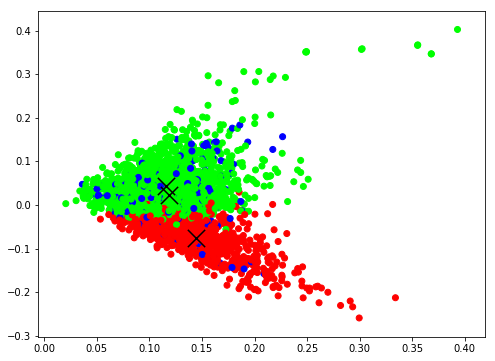

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
centroids = kmeans.cluster_centers_
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:,0], X[:,1],cmap=plt.cm.brg, c=kmeans.labels_)
ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=300, linewidths=5, c='black')

## References:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer
